In [84]:
import h5py
import numpy as np
import os
from tqdm import tqdm
import concurrent.futures
import matplotlib.pyplot as plt
import numpy as np

In [85]:
path = "Users/simon/Desktop/We_are_in/2025-nc-hackathon-event-id/data/DVS128-Gait-DATASET/DVS128-Gait-Day/events/Simon_GNTM/recording_2025-11-10_17-51-39.h5"

# ensure the path is correct or try to locate the file under search_root
if not os.path.exists(path):
    # try adding a leading slash if missing
    alt = path if path.startswith(os.sep) else os.sep + path
    if os.path.exists(alt):
        path = alt
    else:
        # try to find the file by filename under search_root
        matches = []
        for dirpath, dirnames, filenames in os.walk(search_root):
            if filename in filenames:
                matches.append(os.path.join(dirpath, filename))
        if matches:
            path = matches[0]
            print(f"Found '{filename}' at: {path}")
        else:
            raise FileNotFoundError(f"Could not find file '{path}' or '{filename}' under '{search_root}'")

with h5py.File(path, "r") as f:
    print("Keys:", list(f.keys()))
    a_group_key = list(f.keys())[0]
    print("Type of first key:", type(f[a_group_key])) 
    obj = f[a_group_key]
    try:
        arr = obj[()]  # try to read as numpy array
        print("Dataset shape:", getattr(arr, "shape", None))
    except Exception:
        print("Could not read as array; listing members:", list(obj))

Keys: ['events']
Type of first key: <class 'h5py._hl.group.Group'>
Could not read as array; listing members: ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214'

In [86]:
with h5py.File(path, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f.keys()))
    
    # Navigate to the actual dataset - it seems to be nested
    events_group = f['events']
    print("Events group keys:", list(events_group.keys()))
    
    # Get the first dataset key and read the data
    dataset_key = list(events_group.keys())[5]
    data = events_group[dataset_key][()] 
    print(data)

Keys: ['events']
Events group keys: ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '2

In [87]:
# This list will hold all the event data
all_events_list = []

print(f"Opening file: {path}")

try:
    with h5py.File(path, 'r') as f:
        # 1. Access the 'events' group
        if 'events' not in f:
            print("Error: 'events' group not found in the file.")
        else:
            events_group = f['events']
            
            # 2. Get all dataset keys
            event_keys = list(events_group.keys())
            
            # 3. Sort the keys NUMERICALLY, not alphabetically
            # This is crucial so that '2' comes before '10'
            try:
                sorted_keys = sorted(event_keys, key=int)
                print(f"Found {len(sorted_keys)} event datasets. Keys: {sorted_keys[:10]}...") # Print first 10
            except ValueError:
                print("Error: Could not sort keys numerically. Are all keys numbers?")
                sorted_keys = event_keys # Fallback to default sort if they aren't numbers

            # 4. Loop through sorted keys and append data
            for key in sorted_keys:
                # Read the data, which is a structured array, e.g., [(...)(...)]
                data = events_group[key][()]
                
                # Check if the dataset is not empty
                if data.size > 0:
                    # .tolist() converts the structured array into a
                    # simple Python list of tuples, e.g., [(...),(...)]
                    # .extend() adds these tuples to our master list
                    all_events_list.extend(data.tolist())

            # 5. Convert the master list into a single (n, 4) NumPy array
            if all_events_list:
                final_events_array = np.array(all_events_list)
                
                print("\n--- Success! ---")
                print("Final array data (first 5 rows):")
                print(final_events_array[:5])
                
                print("\nFinal array shape (n, 4):")
                print(final_events_array.shape)
            else:
                print("The 'events' group was found, but all datasets were empty.")

except FileNotFoundError:
    print(f"Error: File not found at path: {path_to_your_file}")
except Exception as e:
    print(f"An error occurred: {e}")

Opening file: /Users/simon/Desktop/We_are_in/2025-nc-hackathon-event-id/data/DVS128-Gait-DATASET/DVS128-Gait-Day/events/Simon_GNTM/recording_2025-11-10_17-51-39.h5
Found 555 event datasets. Keys: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']...

--- Success! ---
Final array data (first 5 rows):
[[  363   399     0 18229]
 [  741   549     0 20149]
 [  973   117     0 29647]
 [  645   179     0 36284]
 [  552   261     0 52885]]

Final array shape (n, 4):
(671616, 4)


In [88]:
print(final_events_array.shape)
events = final_events_array
# events = events[::20]  # downsample for visualization
print(events.shape)
print(events[:100])

(671616, 4)
(671616, 4)
[[   363    399      0  18229]
 [   741    549      0  20149]
 [   973    117      0  29647]
 [   645    179      0  36284]
 [   552    261      0  52885]
 [   791    182      0  64235]
 [   903    276      0  66237]
 [   962    150      0 101333]
 [   975    144      0 125087]
 [   560    426      0 126918]
 [   541    203      0 133393]
 [   871    255      0 143899]
 [   949    275      0 206006]
 [   828    136      0 216568]
 [   926    176      0 266531]
 [   965    394      0 269599]
 [   716    375      0 271195]
 [   880    294      0 277666]
 [   582    582      0 284158]
 [   871    255      1 288119]
 [   938    378      0 296147]
 [   972    154      0 334646]
 [   790    169      0 338732]
 [   900    283      0 344006]
 [   392    544      0 345479]
 [   366    277      0 355896]
 [   510    278      0 363527]
 [   384    553      0 373826]
 [   698    545      0 374145]
 [   933    149      0 380447]
 [   343    586      0 388114]
 [   341    585

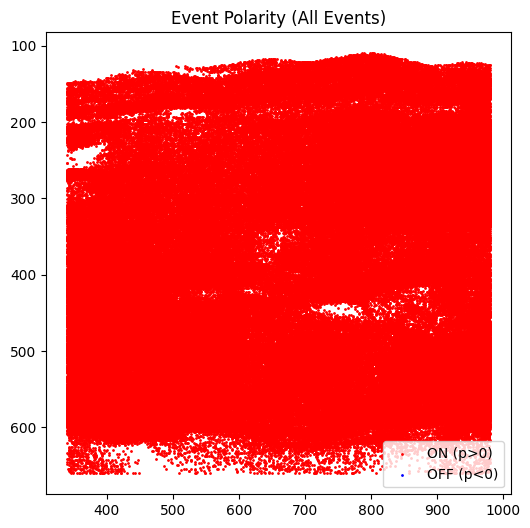

In [89]:
# events: array of shape (N,4) → [x, y, p, t]
x = events[:,0].astype(int)
y = events[:,1].astype(int)
p = events[:,2].astype(int)
t = events[:,3].astype(int)

plt.figure(figsize=(6,6))
plt.scatter(x[p>0], y[p>0], s=1, c='red', label='ON (p>0)')
plt.scatter(x[p<0], y[p<0], s=1, c='blue', label='OFF (p<0)')

plt.gca().invert_yaxis()  # correct orientation
plt.legend()
plt.title("Event Polarity (All Events)")
plt.show()

Cropping to (x, y) region: [320:960, 40:680]
Original events: 671616, Cropped events: 622626
Done.


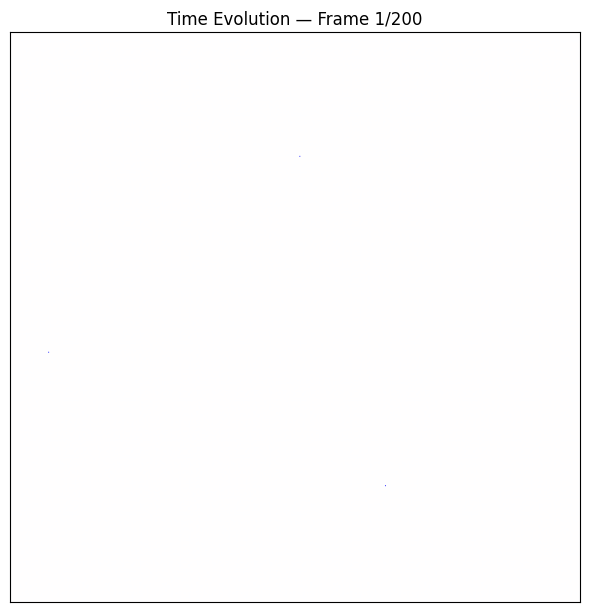

In [90]:
FULL_WIDTH = 1280
FULL_HEIGHT = 720
CROP_WIDTH = 640
CROP_HEIGHT = 640

# --- 2. CALCULATE TOP-LEFT CORNER (Assuming a centered crop) ---
# This finds the (x, y) coordinate of the top-left pixel of your crop
x_min = (FULL_WIDTH - CROP_WIDTH) // 2   # (1280 - 640) / 2 = 320
y_min = (FULL_HEIGHT - CROP_HEIGHT) // 2 # (720 - 640) / 2 = 40

# Define the max boundaries
x_max = x_min + CROP_WIDTH
y_max = y_min + CROP_HEIGHT

print(f"Cropping to (x, y) region: [{x_min}:{x_max}, {y_min}:{y_max}]")

# --- 3. FILTER 'events' ARRAY ---
# Create boolean masks for x and y
mask_x = (events[:, 0] >= x_min) & (events[:, 0] < x_max)
mask_y = (events[:, 1] >= y_min) & (events[:, 1] < y_max)

# Combine masks
combined_mask = mask_x & mask_y

# Apply the mask to get ONLY the events in your 640x640 window
cropped_events = events[combined_mask].copy() # .copy() is important!
print(f"Original events: {len(events)}, Cropped events: {len(cropped_events)}")

# --- 4. REMAP COORDINATES ---
# Subtract the offset so (x, y) now go from (0, 0) to (639, 639)
cropped_events[:, 0] = cropped_events[:, 0] - x_min  # Remap X
cropped_events[:, 1] = cropped_events[:, 1] - y_min  # Remap Y

# --- 5. NORMALIZE TIME (based on *cropped* data) ---
if len(cropped_events) > 0:
    t = cropped_events[:, 3] 
    t_min = t.min()
    t_max = t.max()
    t_range = t_max - t_min if (t_max - t_min) > 0 else 1.0
else:
    print("No events found in the cropped region!")
    # Handle error, maybe exit
    t_min, t_range = 0, 1.0

n_frames = 200 # Number of animation steps
frames = np.zeros((n_frames, CROP_HEIGHT, CROP_WIDTH))

# --- FIX 3: Unpack columns in the correct order (x, y, p, t) ---
for xi, yi, pi, ti in cropped_events:
    # Normalize time
    ti_norm = (ti - t_min) / t_range
    
    # Find frame index based on time
    idx = int(ti_norm * (n_frames - 1))
    
    # --- FIX 4: Use Y and X for spatial coordinates ---
    # This now correctly plots at (row, column) -> (y, x)
    try:
        frames[idx, int(yi), int(xi)] += 1 if pi > 0 else -1
    except IndexError:
        # This is a good check to have
        print(f"Warning: Index out of bounds. Event (x,y) = ({xi}, {yi})")

fig, ax = plt.subplots(figsize=(6, 6))
# Set vmin/vmax to a reasonable percentile if frames.max() is too skewed by one hot pixel
v_max = np.percentile(np.abs(frames), 99.9) 
if v_max == 0: v_max = 1.0 # Handle case where 99.9% is 0

im = ax.imshow(frames[0], cmap='bwr', vmin=-v_max, vmax=v_max)
ax.invert_yaxis()
# plt.colorbar(im, ax=ax)

def update(step):
    im.set_data(frames[step])
    ax.set_title(f"Time Evolution — Frame {step+1}/{n_frames}")
    return [im]

ani = FuncAnimation(fig, update, frames=n_frames, interval=200, blit=False)

# Remove axes and ticks
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.invert_yaxis()
plt.tight_layout()

ani.save("simon.gif", fps=10, writer='pillow') # 'pillow' is a reliable writer
print("Done.")